In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### Droping Customer ID

df.drop("customerID",axis=1,inplace=True)

In [4]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [9]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [10]:
df1["TotalCharges"] = pd.DataFrame(pd.to_numeric(df1["TotalCharges"])) ### we got pandas series so we have to convert it into dataframe

<ipython-input-10-322dd0750bc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"] = pd.DataFrame(pd.to_numeric(df1["TotalCharges"])) ### we got pandas series so we have to convert it into dataframe


In [11]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [12]:
#### Visualization
tenure_churn_no = df1[df1["Churn"] == "No"]["tenure"]
tenure_churn_yes = df1[df1["Churn"] == "Yes"]["tenure"]

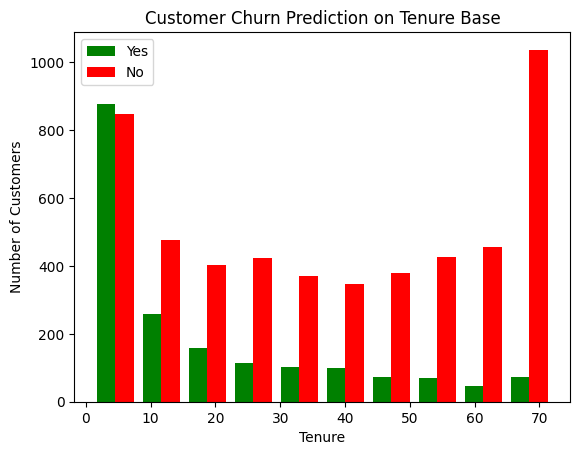

In [13]:
plt.hist([tenure_churn_yes,tenure_churn_no],label=["Yes","No"],color=["green","red"])
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction on Tenure Base")
plt.legend()

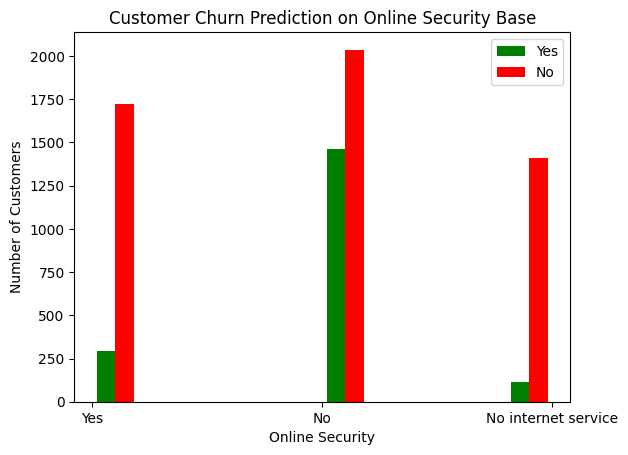

In [14]:
online_security_churn_no = df1[df1["Churn"] == "No"]["OnlineSecurity"]
online_security_churn_yes = df1[df1["Churn"] == "Yes"]["OnlineSecurity"]

plt.hist([online_security_churn_yes,online_security_churn_no],color=["green","red"],label=["Yes","No"])
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction on Online Security Base")
plt.legend()

In [15]:
def print_unique_value_col(df):
    for col in df1:
      if df1[col].dtypes == "object":
        print(f'{col} : {df1[col].unique()}')

In [16]:
print_unique_value_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

<ipython-input-17-7b7510fc8626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
<ipython-input-17-7b7510fc8626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [18]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
print_unique_value_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df1.replace(["Yes","No"],[1,0],inplace=True)

<ipython-input-20-9289c310784a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(["Yes","No"],[1,0],inplace=True)
<ipython-input-20-9289c310784a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(["Yes","No"],[1,0],inplace=True)


In [21]:
print_unique_value_col(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df1["gender"].replace({"Female" : 1 , "Male" : 0},inplace=True)

<ipython-input-22-c2ef6e2d78ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({"Female" : 1 , "Male" : 0},inplace=True)
<ipython-input-22-c2ef6e2d78ec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gender"].replace({"Female" : 1 , "Male" : 0},inplace=True)
<ipython-i

In [23]:
df2 = pd.get_dummies(data=df1 , columns=["InternetService","Contract" , "PaymentMethod"]).replace([False,True],[0,1])

<ipython-input-23-960fdf75a4aa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = pd.get_dummies(data=df1 , columns=["InternetService","Contract" , "PaymentMethod"]).replace([False,True],[0,1])


In [24]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [26]:
#### Scaling

cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [28]:
#### Train Test Split

from sklearn.model_selection import train_test_split
X = df2.drop("Churn",axis=1)
y = df2["Churn"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [29]:
X_train.shape , X_test.shape

((5625, 26), (1407, 26))

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
def ANN(X_train,y_train,X_test,y_test,loss,weight):
    model = keras.Sequential([
      keras.layers.Dense(26,input_shape=(26, ),activation="relu"),
      keras.layers.Dense(16,activation="relu"),
      keras.layers.Dense(1,activation="sigmoid")
    ])


    model.compile(optimizer="adam",loss=loss,metrics=["accuracy"])
    if weight == -1:
      model.fit(X_train,y_train,epochs=100)
    else:
      model.fit(X_train,y_train,epochs=100,class_weight=weight)

    print(model.evaluate(X_test,y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report : \n",classification_report(y_test,y_preds))

    return y_preds

In [32]:
y_preds = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7276 - loss: 0.5475
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4272
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.4309
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.4174
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4076
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.4223
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.4213
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.4154
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8109 - loss: 0.4020
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.3995
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.3962
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [33]:
y_test.value_counts()

,count
Churn,
0,1033
1,374


# **1. UnderSampling with Majority Class**

In [34]:
count_0 , count_1 = df.Churn.value_counts()
count_0 , count_1

(5174, 1869)

In [35]:
df_count_0 = df2[df2["Churn"] == 0]
df_count_1 = df2[df2["Churn"] == 1]

In [36]:
df_count_0_undersample = df_count_0.sample(count_1)

In [37]:
df_test_undersample = pd.concat([df_count_0_undersample,df_count_1],axis=0)

In [38]:
print("After UnderSampling")
df_test_undersample["Churn"].value_counts()

After UnderSampling


,count
Churn,
0,1869
1,1869


In [39]:
X = df_test_undersample.drop("Churn",axis=1)
y = df_test_undersample["Churn"]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [40]:
y_train.value_counts() , y_test.value_counts()

(Churn
 0    1495
 1    1495
 Name: count, dtype: int64,
 Churn
 1    374
 0    374
 Name: count, dtype: int64)

In [41]:
y_preds = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6137 - loss: 0.6514
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7363 - loss: 0.5421
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7660 - loss: 0.5133
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4885
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.4678
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4855
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4698
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.4836
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7774 - loss: 0.4657
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7853 - loss: 0.4595
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.4739
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7792 - lo

# OverSampling of Minority Class (blind Copy)

In [42]:
count_0 , count_1

(5174, 1869)

In [43]:
df_class_1_oversampling = df_count_1.sample(count_0,replace=True)

In [44]:
df_test_oversample = pd.concat([df_count_0 , df_class_1_oversampling],axis=0)

In [45]:
print("After OverSample Blind Copy")
df_test_oversample["Churn"].value_counts()

After OverSample Blind Copy


,count
Churn,
1,5174
0,5163


In [46]:
X = df_test_oversample.drop("Churn",axis=1)
y = df_test_oversample["Churn"]

from sklearn.model_selection import train_test_split
X_train  , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [47]:
y_train.value_counts() , y_test.value_counts()

(Churn
 1    4139
 0    4130
 Name: count, dtype: int64,
 Churn
 1    1035
 0    1033
 Name: count, dtype: int64)

In [48]:
y_preds = ANN(X_train , y_train , X_test , y_test , "binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6163 - loss: 0.6508
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 0.5071
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7616 - loss: 0.4976
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7613 - loss: 0.4916
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7756 - loss: 0.4865
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7660 - loss: 0.4862
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.4769
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.4687
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7808 - loss: 0.4734
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7866 - loss: 0.4519
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7847 - loss: 0.4601
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# OverSampling of Minority Class (SMOTE)

In [49]:
X = df2.drop("Churn",axis=1)
y = df2["Churn"]

In [50]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [51]:
### Pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm , y_sm = smote.fit_resample(X,y)



In [52]:
print("After SMOTE OverSampling")
y_sm.value_counts()

After SMOTE OverSampling


,count
Churn,
0,5163
1,5163


In [53]:
X_train , X_test , y_train , y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)


In [54]:
y_train.value_counts()

,count
Churn,
0,4130
1,4130


In [55]:
y_test.value_counts()

,count
Churn,
0,1033
1,1033


In [56]:
y_preds = ANN(X_train , y_train , X_test , y_test , "binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6610 - loss: 0.6259
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7728 - loss: 0.4753
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7786 - loss: 0.4632
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7801 - loss: 0.4523
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7953 - loss: 0.4407
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7885 - loss: 0.4447
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.4437
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7903 - loss: 0.4310
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.4261
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7877 - loss: 0.4332
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4210
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# 4. Ensemble

In [57]:
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [58]:
X = df2.drop("Churn",axis=1)
y = df2["Churn"]

In [59]:
X_train , X_test , y_trian , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [60]:
y_train.value_counts()

,count
Churn,
0,4130
1,4130


In [61]:
y_test.value_counts()

,count
Churn,
0,1033
1,374


In [62]:
df3 = X_train.copy()
df3["Churn"] = y_train

In [65]:
df3_count_0 = df3[df3["Churn"] == 0]
df3_count_1 = df3[df3["Churn"] == 1]

In [70]:
df3_count_0["Churn"].value_counts()  , df3_count_1["Churn"].value_counts()

(Churn
 0.0    3351
 Name: count, dtype: int64,
 Churn
 1.0    1187
 Name: count, dtype: int64)

In [71]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train = pd.concat([df_majority[start:end],df_majority],axis=0)

  X_train = df_train.drop("Churn",axis=1)
  y_train = df_train["Churn"]

  return X_train , y_train

In [73]:
X_train , y_train = get_train_batch(df3_count_0,df3_count_1 , 0 , 1187)

y_pred1 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9491 - loss: 0.2465
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.2190e-04
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5920e-04
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4024e-04
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7361e-04
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2408e-04
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.6885e-05
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.3783e-05
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4286e-05
Epoch 12/100
142/142 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
X_train , y_train = get_train_batch(df3_count_0,df3_count_1 , 1187 , 2374)

y_pred2 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7742 - loss: 0.4473
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0064
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.1058e-04
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.8476e-04
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.8074e-04
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.1974e-04
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.5673e-05
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.1177e-05
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.9215e-05
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.9656e-05
Epoch 12/100
142/142 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
X_train , y_train = get_train_batch(df3_count_0,df3_count_1 , 2374 , 3351)

y_pred3 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6134 - loss: 0.5944
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.2173e-04
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.3327e-04
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.3964e-04
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.2619e-05
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4644e-05
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.1936e-05
Epoch 10/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.2348e-05
Epoch 11/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.1969e-05
Epoch 12/100
136/136 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0



In [83]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
